In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_train = pd.read_csv(r'D:\data science\data science assg\ass.12 navine\SalaryData_Train.csv')
df_test = pd.read_csv(r'D:\data science\data science assg\ass.12 navine\SalaryData_Test.csv')

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

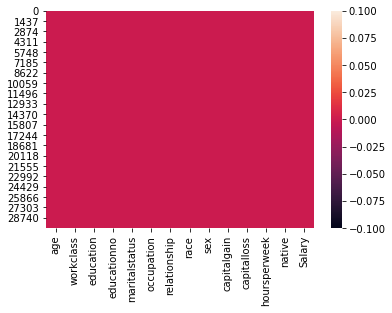

In [4]:
sns.heatmap(df_train.isnull())

<AxesSubplot:xlabel='sex', ylabel='count'>

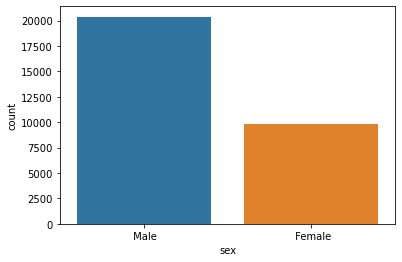

In [5]:
sns.countplot(x='sex',data=df_train)

<AxesSubplot:xlabel='sex', ylabel='count'>

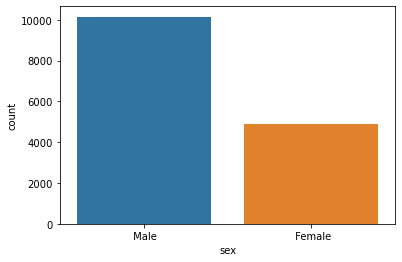

In [6]:
sns.countplot(x='sex',data=df_test)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
df_train['Salary']=le.fit_transform(df_train['Salary'])
df_test['Salary']=le.fit_transform(df_test['Salary'])

In [9]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [10]:
X_train=df_train.drop('Salary',axis=1)
y_train=df_train['Salary']
X_test=df_test.drop('Salary',axis=1)
y_test=df_test['Salary']

In [11]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [12]:
classifier.score(X_test,y_test)

0.8029216467463479

# prediction

In [13]:
pre=classifier.predict(X_test)
pre

array([0, 0, 1, ..., 1, 1, 1])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9754
           1       0.82      0.57      0.67      5306

    accuracy                           0.80     15060
   macro avg       0.81      0.75      0.76     15060
weighted avg       0.80      0.80      0.79     15060

